In [1]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
from sklearn.impute import IterativeImputer

In [3]:
bf = pd.read_csv('train.csv')
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


<AxesSubplot:>

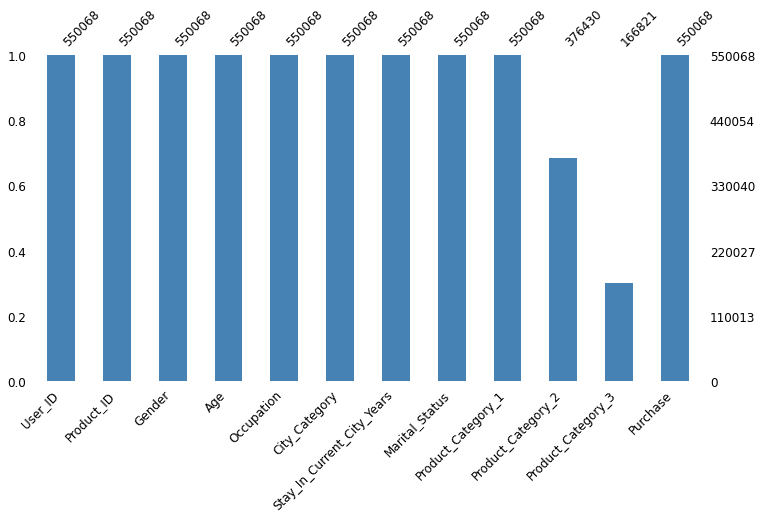

In [6]:
msno.bar(bf, figsize=(12, 6), fontsize=12, color='steelblue') 

In [7]:
bf_mean = bf.copy()
mean_imputer = SimpleImputer(strategy='mean')
bf_mean['Product_Category_2'] = mean_imputer.fit_transform(bf_mean['Product_Category_2'].values.reshape(-1,1))
bf_mean['Product_Category_3'] = mean_imputer.fit_transform(bf_mean['Product_Category_3'].values.reshape(-1,1))

bf_mode = bf.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
bf_mode['Product_Category_2'] = mode_imputer.fit_transform(bf_mode['Product_Category_2'].values.reshape(-1,1))
bf_mode['Product_Category_3'] = mode_imputer.fit_transform(bf_mode['Product_Category_3'].values.reshape(-1,1))

bf_ii = bf[["Product_Category_2", "Product_Category_3"]].copy(deep=True)
bf_iif = bf.copy(deep=True)
ii_imp = IterativeImputer(
    estimator=BayesianRidge(),
    imputation_order='ascending',
    initial_strategy='median',
    n_nearest_features=10,
    max_iter=10, 
    random_state=0
)
bf_iif.iloc[:, 9:11] = ii_imp.fit_transform(bf_ii)

Text(0.5, 1.0, 'Product_Category_3 distribution before and after imputation')

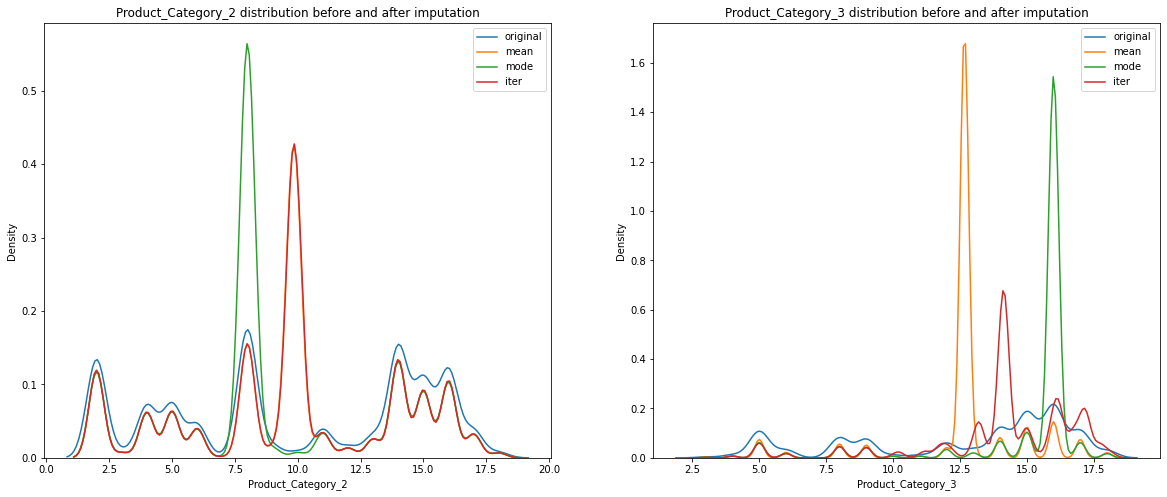

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

sns.kdeplot(ax=axes[0], data=bf, x="Product_Category_2", label="original")
sns.kdeplot(ax=axes[0], data=bf_mean, x="Product_Category_2", label="mean")
sns.kdeplot(ax=axes[0], data=bf_mode, x="Product_Category_2", label="mode")
sns.kdeplot(ax=axes[0], data=bf_iif, x="Product_Category_2", label="iter")
axes[0].legend()
axes[0].set_title('Product_Category_2 distribution before and after imputation')

sns.kdeplot(ax=axes[1], data=bf, x="Product_Category_3", label="original")
sns.kdeplot(ax=axes[1], data=bf_mean, x="Product_Category_3", label="mean")
sns.kdeplot(ax=axes[1], data=bf_mode, x="Product_Category_3", label="mode")
sns.kdeplot(ax=axes[1], data=bf_iif, x="Product_Category_3", label="iter")
axes[1].legend()
axes[1].set_title('Product_Category_3 distribution before and after imputation')

<AxesSubplot:>

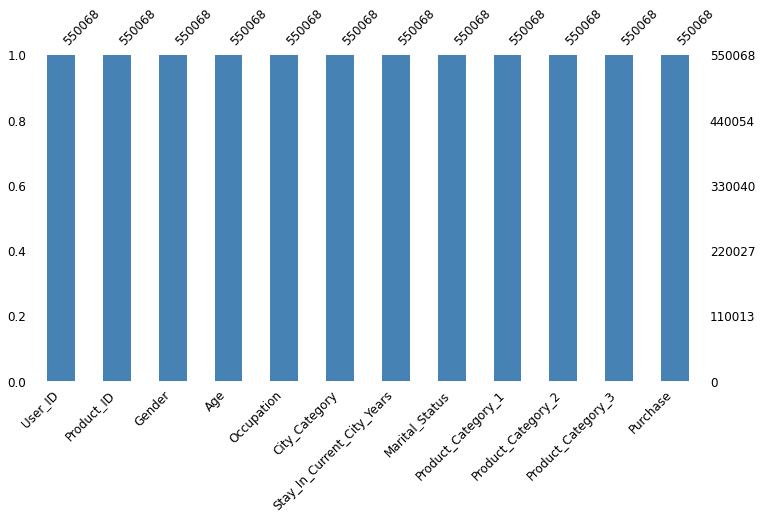

In [9]:
msno.bar(bf_mode, figsize=(12, 6), fontsize=12, color='steelblue')

In [10]:
bf_mode.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [11]:
gba = bf_mode.groupby('Age').size().reset_index(name='counts')
gba.head()

,Age,counts
0,0-17,15102
1,18-25,99660
2,26-35,219587
3,36-45,110013
4,46-50,45701


In [12]:
gbam = bf_mode.groupby(['Marital_Status', 'Age']).size().reset_index(name='counts')

In [13]:
gbga = bf_mode.groupby(['Gender', 'Age']).size().reset_index(name='counts')
gbga.head()

,Gender,Age,counts
0,F,0-17,5083
1,F,18-25,24628
2,F,26-35,50752
3,F,36-45,27170
4,F,46-50,13199


In [14]:
gboa = bf_mode.groupby(['Gender', 'Age','Occupation']).size().reset_index(name='counts')
gboa.head()

,Gender,Age,Occupation,counts
0,F,0-17,0,747
1,F,0-17,1,173
2,F,0-17,2,91
3,F,0-17,7,43
4,F,0-17,10,3914


No handles with labels found to put in legend.


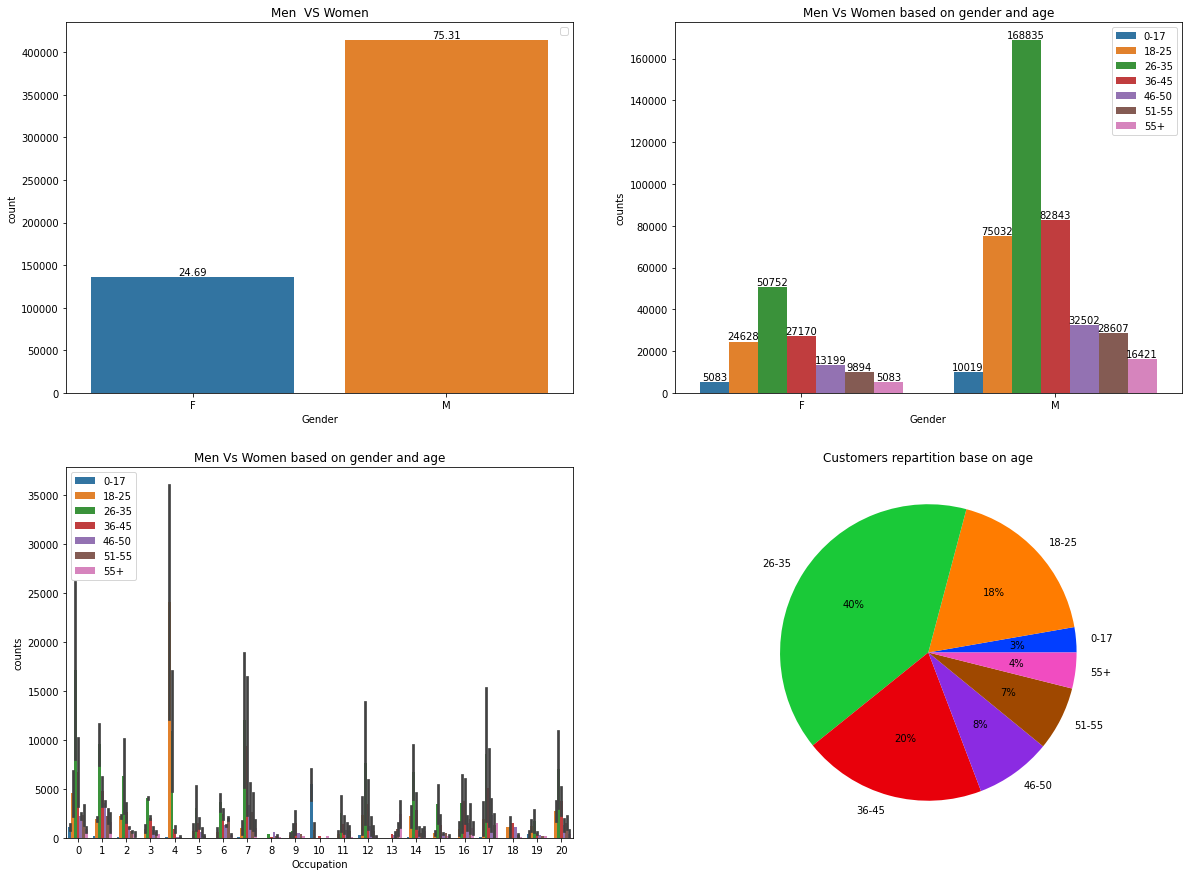

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,15))

ax0 = sns.countplot(ax=axes[0, 0], x=bf_mode["Gender"])
blabel = np.round(ax0.containers[0].datavalues / (len(bf_mode)) *100, 2)
ax0.bar_label(ax0.containers[0], labels=blabel)
axes[0, 0].legend()
axes[0, 0].set_title('Men  VS Women')

ax1 = sns.barplot(ax=axes[0,1], data=gbga, x="Gender", y="counts", hue="Age")
for container in ax1.containers:
    ax1.bar_label(container)
#ax.margins(y=0.1)  
axes[0,1].legend()
axes[0,1].set_title('Men Vs Women based on gender and age')

ax1 = sns.barplot(ax=axes[1,0], data=gboa, x="Occupation", y="counts", hue="Age")
axes[1,0].legend()
axes[1,0].set_title('Men Vs Women based on gender and age')

colors = sns.color_palette('bright')[0:len(gba)]
labels = gba.Age.values
plt.pie(gba.counts.values,labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Customers repartition base on age')
#plt.figure(dpi=50)
plt.show()

In [16]:
gbms = bf_mode.groupby(['Marital_Status', 'Stay_In_Current_City_Years']).size().reset_index(name='counts')
gbms.head()

,Marital_Status,Stay_In_Current_City_Years,counts
0,0,0,44908
1,0,1,110696
2,0,2,60800
3,0,3,57647
4,0,4+,50680


<AxesSubplot:xlabel='Marital_Status', ylabel='counts'>

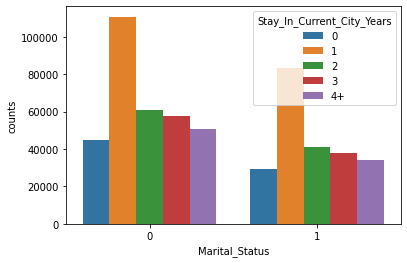

In [17]:
sns.barplot(data=gbms, x="Marital_Status", y="counts", hue="Stay_In_Current_City_Years")

In [18]:
gbas = bf_mode.groupby(['Age', 'Stay_In_Current_City_Years']).size().reset_index(name='counts')
gbas.head()

,Age,Stay_In_Current_City_Years,counts
0,0-17,0,2210
1,0-17,1,4925
2,0-17,2,3550
3,0-17,3,2765
4,0-17,4+,1652


<AxesSubplot:xlabel='Age', ylabel='counts'>

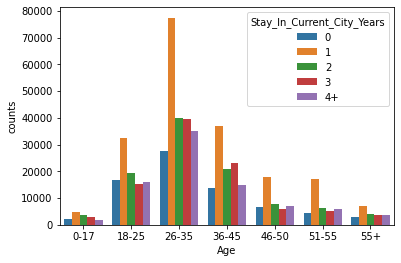

In [19]:
sns.barplot(data=gbas, x="Age", y="counts", hue="Stay_In_Current_City_Years")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Customers marital status vs age')

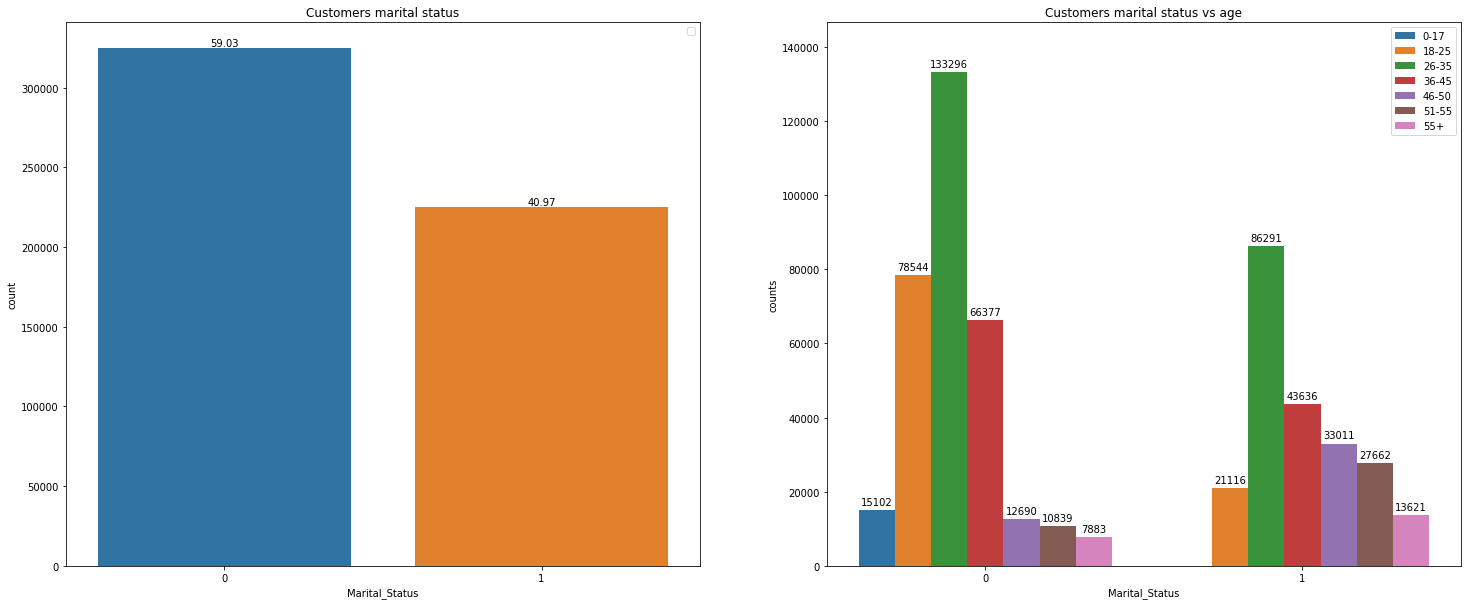

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25,10))

ax1 = sns.countplot(ax=axes[0], x=bf_mode["Marital_Status"])
blabel = np.round(ax1.containers[0].datavalues / (len(bf_mode)) *100, 2)
ax1.bar_label(ax1.containers[0], labels = blabel)
axes[0].legend()
axes[0].set_title('Customers marital status')


ax0 = sns.barplot(ax=axes[1], data=gbam, x="Marital_Status", y="counts", hue="Age")
for container in ax0.containers:
    ax0.bar_label(container, padding=3)
ax0.margins(y=0.1)  
axes[1].legend()
axes[1].set_title('Customers marital status vs age')

In [21]:
gbca = bf_mode.groupby(['City_Category', 'Age']).size().reset_index(name='counts')
gbca.head()

,City_Category,Age,counts
0,A,0-17,2544
1,A,18-25,27535
2,A,26-35,73745
3,A,36-45,26617
4,A,46-50,7607


In [22]:
gbco = bf_mode.groupby(['City_Category', 'Occupation']).size().reset_index(name='counts')
gbco.head()

,City_Category,Occupation,counts
0,A,0,18858
1,A,1,12809
2,A,2,9232
3,A,3,5645
4,A,4,24205


No handles with labels found to put in legend.


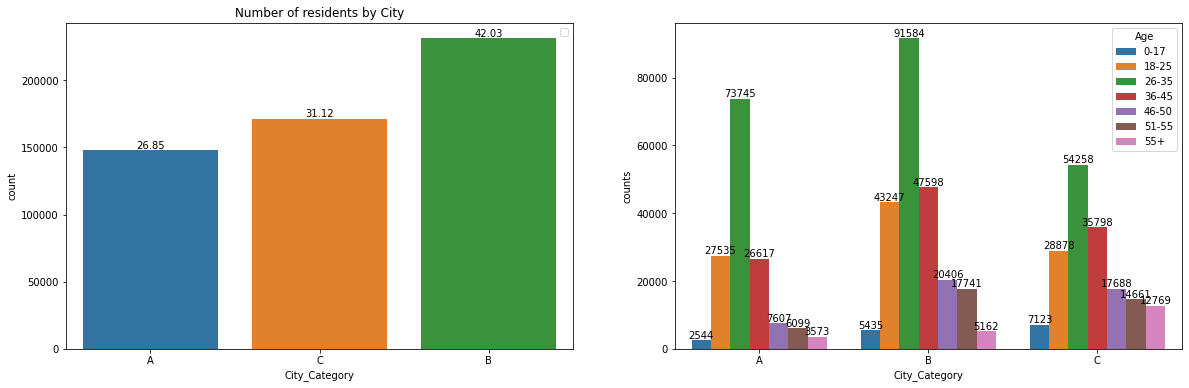

In [23]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,6))

ax0 = sns.countplot(ax=axes[0], x=bf_mode["City_Category"], orient='h')
blabel = np.round(ax0.containers[0].datavalues / (len(bf_mode)) *100, 2)
ax0.bar_label(ax0.containers[0], labels = blabel)
axes[0].legend()
axes[0].set_title('Number of residents by City')

ax1 = sns.barplot(ax=axes[1], data=gbca, x="City_Category", y="counts", hue="Age")
for container in ax1.containers:
    ax1.bar_label(container)


<AxesSubplot:xlabel='Occupation', ylabel='counts'>

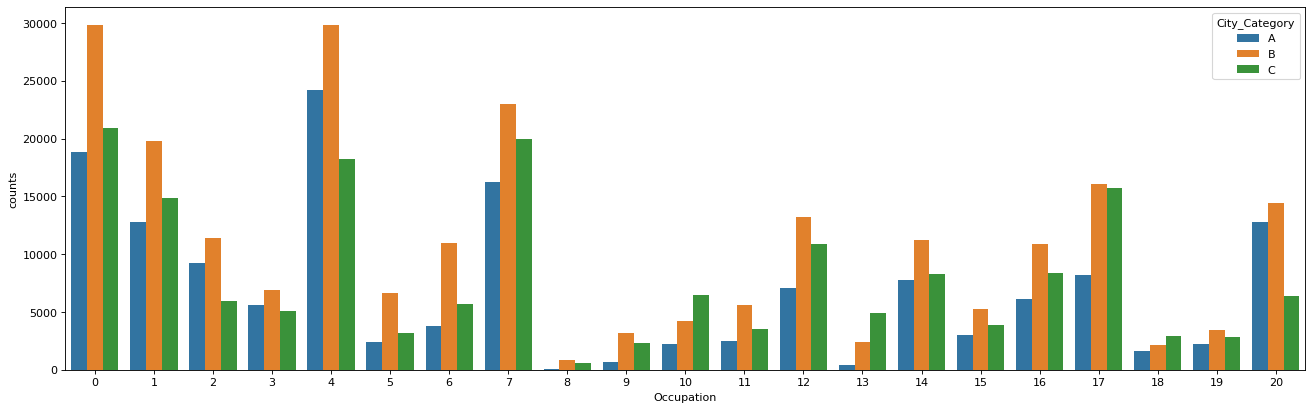

In [24]:
figure(figsize=(20, 6), dpi=80)
sns.barplot(data=gbco, x="Occupation", y="counts", hue="City_Category")

In [25]:
gbgpr = bf_mode.groupby('Gender')[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].sum()
gbgpr.head()

,Product_Category_1,Product_Category_2,Product_Category_3
Gender,,,
F,776517,1270371.0,2039619.0
M,2196199,3823681.0,6205662.0


In [26]:
gbapr = bf_mode.groupby('Age')[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].sum()
gbapr.head()

,Product_Category_1,Product_Category_2,Product_Category_3
Age,,,
0-17,76775,131787.0,221389.0
18-25,509371,898960.0,1481545.0
26-35,1166945,2028694.0,3288944.0
36-45,604438,1027385.0,1652060.0
46-50,262424,433100.0,690291.0


In [27]:
gbapr = bf_mode.groupby('Age')[["Purchase"]].sum()
gbapr.head()

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
